In [93]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline
start_time = datetime.now()

In [94]:
# data = pd.read_csv('card transactions.csv', converters={'Merchnum': lambda x: str(x)})

In [95]:
data = pd.read_csv('card transactions.csv')

In [96]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# I notice that there are some sometimes blank columns read so I drop them
# I also want the Date field to be a date time
data.dropna(how='all', axis=1,inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [98]:
data.shape

(96753, 10)

In [99]:
numerics = ['Date','Amount']
categoricals = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [100]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

In [115]:
statistics_of_data1 = []
for col in numerics:
    statistics_of_data1.append((col,
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].min(),
                             data[col].max(),
                                data[col].mean(),
                             data[col].mode()[0],
                                data[col].std()
                             ))

stats_df = pd.DataFrame(statistics_of_data1, columns=['Field Name','# Records With Values', '% Populated', '# Zeros','Min', 'Max','Mean',
                                                      'Most Common','Stdev'])
#stats_df.to_csv('numerics.csv')
stats_df

,Field Name,# Records With Values,% Populated,# Zeros,Min,Max,Mean,Most Common,Stdev
0,Date,96753,100.0%,0,2010-01-01 00:00:00,2010-12-31 00:00:00,2010-06-25 22:21:52.480232960,2010-02-28 00:00:00,98 days 21:38:57.704372484
1,Amount,96753,100.0%,0,0.01,3102045.53,427.885677,3.62,10006.140302


In [117]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0],

                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', '# Records With Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
#stats_df.to_csv('categoricals.csv')
stats_df

,Field Name,# Records With Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,96753,100.0%,0,96753,1
1,Cardnum,96753,100.0%,0,1645,5142148452
2,Merchnum,93378,96.51173607019938%,0,13091,930090121224
3,Merch description,96753,100.0%,0,13126,GSA-FSS-ADV
4,Merch state,95558,98.76489617892985%,0,227,TN
5,Merch zip,92097,95.1877461163995%,0,4567,38118.0
6,Transtype,96753,100.0%,0,4,P
7,Fraud,96753,100.0%,95694,2,0


In [118]:
# data[categoricals] = data[categoricals].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [119]:
data.describe(include='all')

C:\Users\rijul\AppData\Local\Temp\ipykernel_49732\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [120]:
data.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [121]:
data.describe(include = 'all',datetime_is_numeric=True)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,NaN,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,NaN,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,NaN,9310,1688,12035,NaN,96398,NaN,NaN
mean,48377.000000,5.142202e+09,2010-06-25 22:21:52.480232960,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
min,1.000000,5.142110e+09,2010-01-01 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,2010-04-03 00:00:00,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,2010-06-27 00:00:00,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,2010-09-12 00:00:00,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,2010-12-31 00:00:00,NaN,NaN,NaN,99999.000000,NaN,3.102046e+06,1.000000


In [122]:
data.count() * 100 / len(data)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [123]:
%%time
pip install pandas_profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file('Data Summary.html')

SyntaxError: invalid syntax (<unknown>, line 1)

In [124]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95694     #bads: 1059


In [125]:
goods.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [157]:
def three_commas(x):
    b, a = divmod(len(x), 3)
    return ",".join(([x[:a]] if a else []) + [x[a+3*i:a+3*i+3] for i in range(b)])

In [127]:
overall_fraud_rate = len(bads) / len(data)
print(overall_fraud_rate)

0.010945397041952187


In [128]:
len(data['Recnum'].unique())

96753

In [129]:
len(data['Cardnum'].unique())

1645

(200.0, 1300.0)

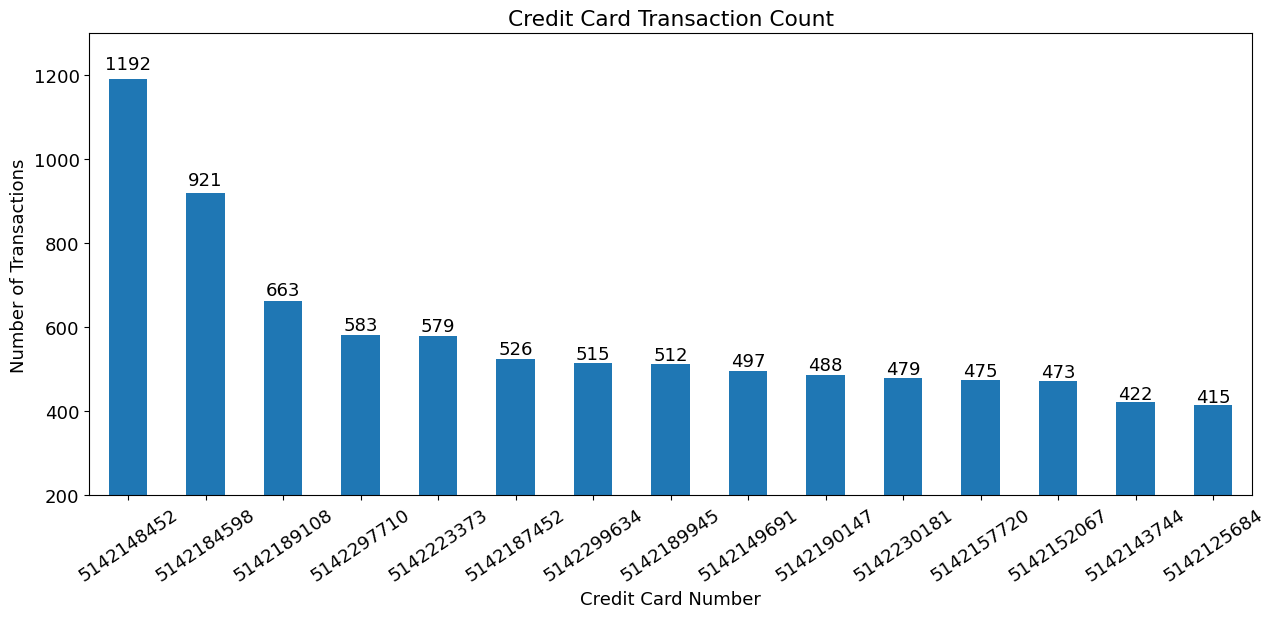

In [131]:
plt.rcParams['font.size'] =  13
plt.rcParams["figure.figsize"] = (15,6)
data['Cardnum'].value_counts().head(15).plot(kind = 'bar',)
for i,j in enumerate(data['Cardnum'].value_counts().head(15)):
    plt.text(i,j*1.02,j,ha = 'center', fontsize = 13)
#plt.yscale('log')
plt.xticks(rotation=34)
plt.title('Credit Card Transaction Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Credit Card Number')
plt.ylim(bottom = 200)
plt.ylim(top = 1300)

In [132]:
len(data['Date'].unique())

365

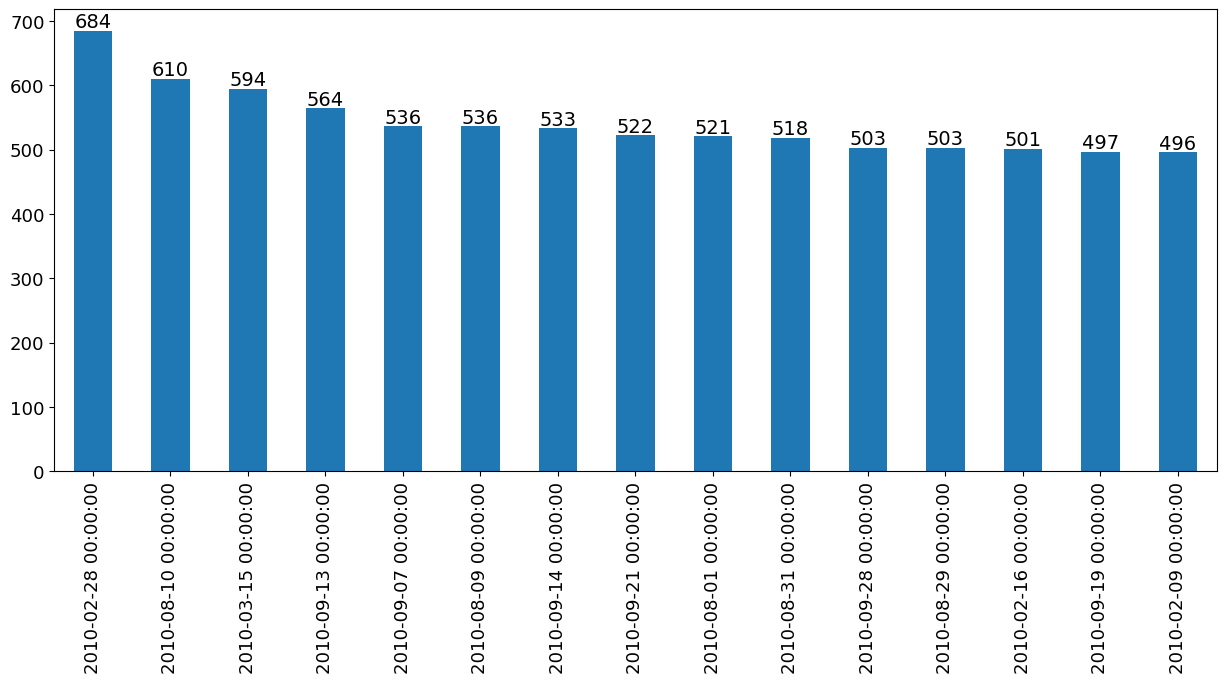

In [133]:
data['Date'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Date'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

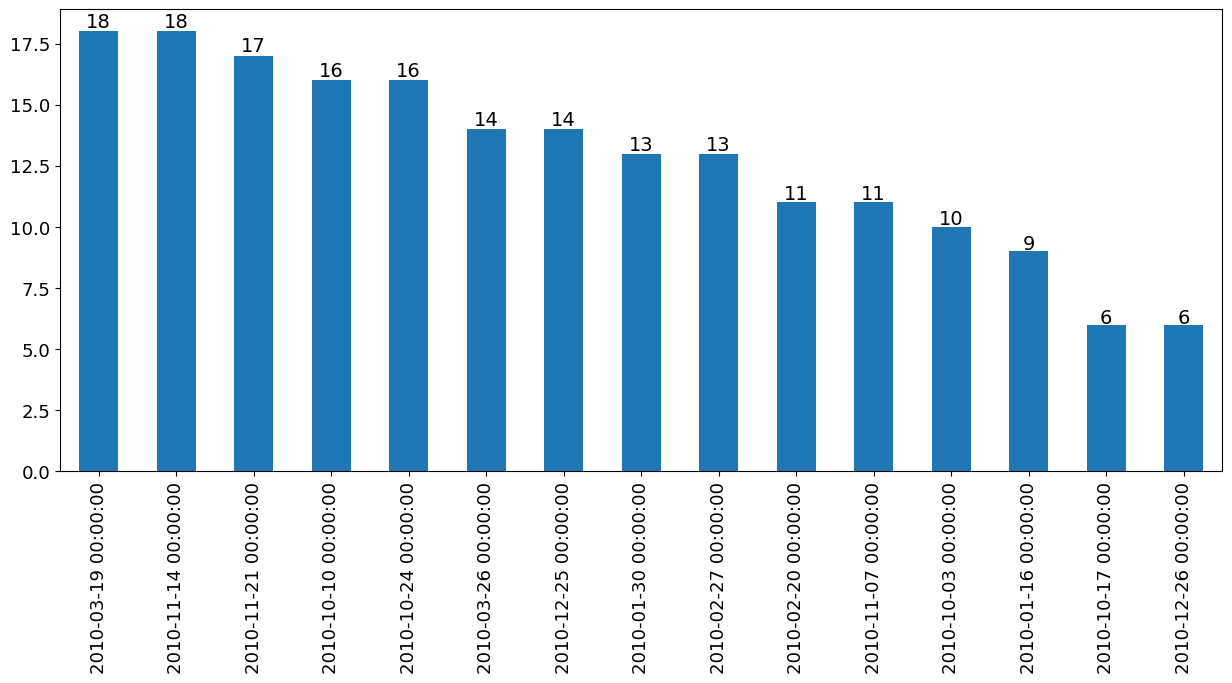

In [134]:
data['Date'].value_counts().tail(15).plot(kind='bar')
for i,j in enumerate(data['Date'].value_counts().tail(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

In [135]:
count_day = data.groupby('Date').count()
count_day.head(20)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


Text(0, 0.5, 'Number of Transactions')

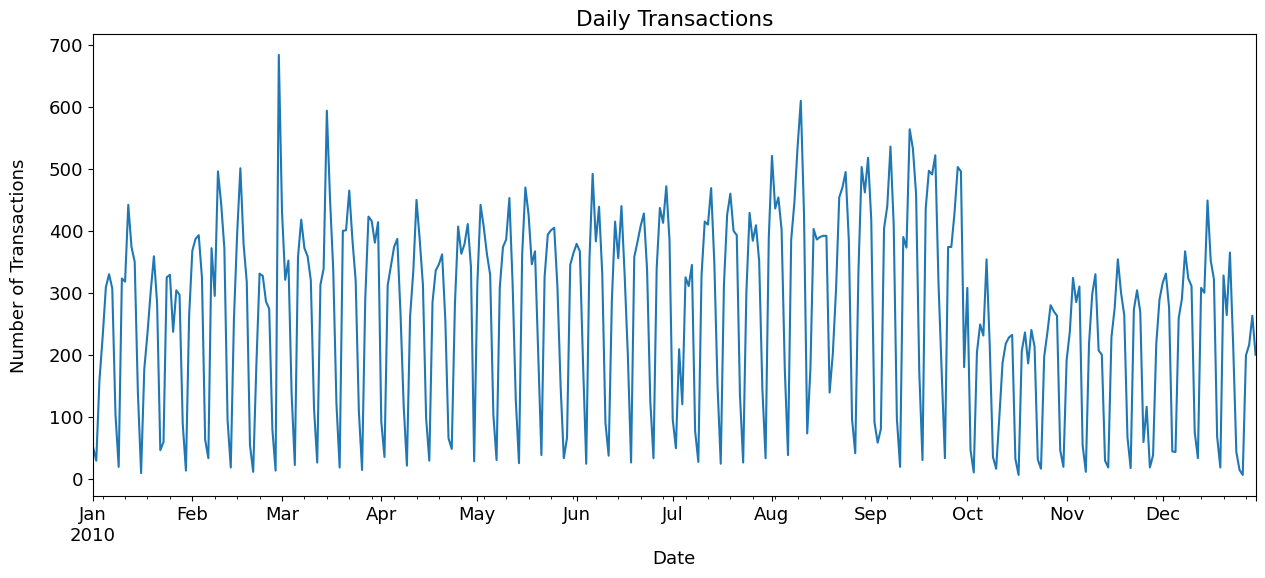

In [136]:
data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 1))\
    .count()[:-1].trx.plot(title = 'Daily Transactions')
plt.ylabel('Number of Transactions', labelpad = 15)

Text(0.5, 1.0, 'Weekly Transactions')

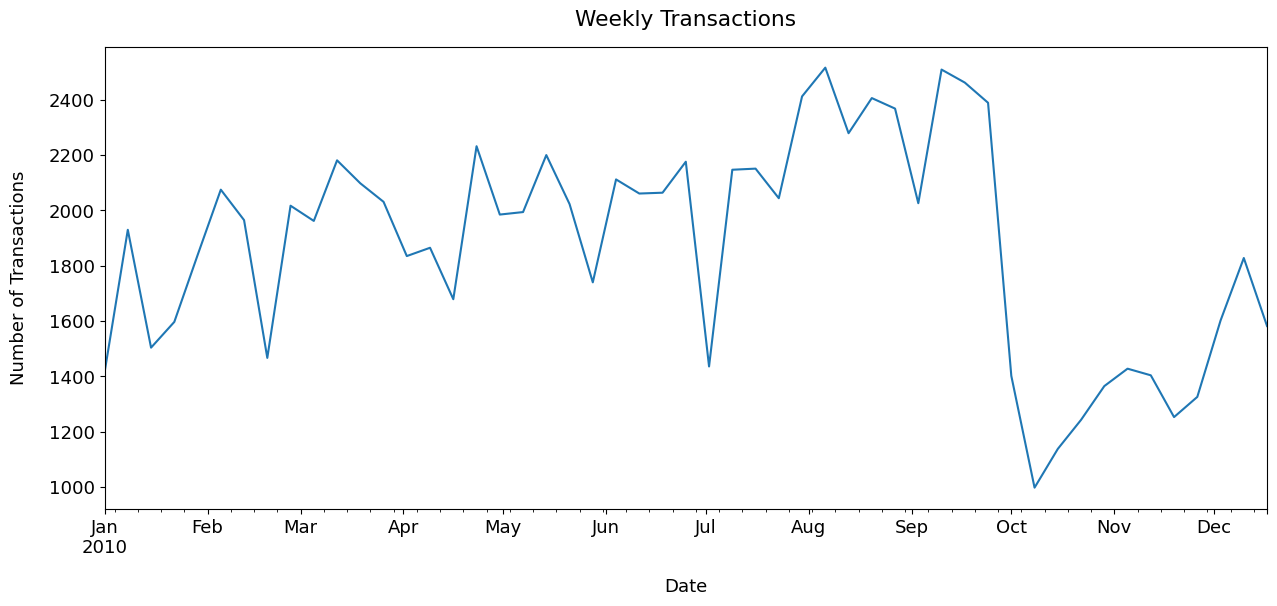

In [137]:
week_plot = data['Date'].value_counts().groupby(pd.Grouper(freq = '7D')).sum()

week_plot.head(51).plot()
plt.xlabel('Date', labelpad = 15)
plt.ylabel('Number of Transactions', labelpad = 15)
# plt.rcParams.update({'figure.figsize':(8,6)})
plt.title('Weekly Transactions', pad = 15)

Date
2010-01-03      73943.29
2010-01-10     612470.46
2010-01-17     621412.40
2010-01-24     572035.25
2010-01-31     532496.82
2010-02-07     700952.73
2010-02-14     690981.26
2010-02-21     618247.23
2010-02-28     743780.07
2010-03-07     711272.65
2010-03-14     697672.54
2010-03-21     886950.79
2010-03-28     701898.69
2010-04-04     741220.36
2010-04-11     640829.84
2010-04-18     677806.47
2010-04-25     593620.67
2010-05-02     863988.95
2010-05-09     721180.71
2010-05-16     776357.36
2010-05-23     755204.06
2010-05-30     651522.35
2010-06-06     878174.11
2010-06-13     757829.85
2010-06-20     755333.04
2010-06-27     899811.33
2010-07-04     666189.46
2010-07-11     784056.79
2010-07-18    3929628.71
2010-07-25     773759.24
2010-08-01     890240.27
2010-08-08    1265458.24
2010-08-15    1064378.68
2010-08-22     852384.34
2010-08-29     957550.70
2010-09-05     944387.97
2010-09-12    1004740.83
2010-09-19    1247424.64
2010-09-26    1034408.16
2010-10-03    105040

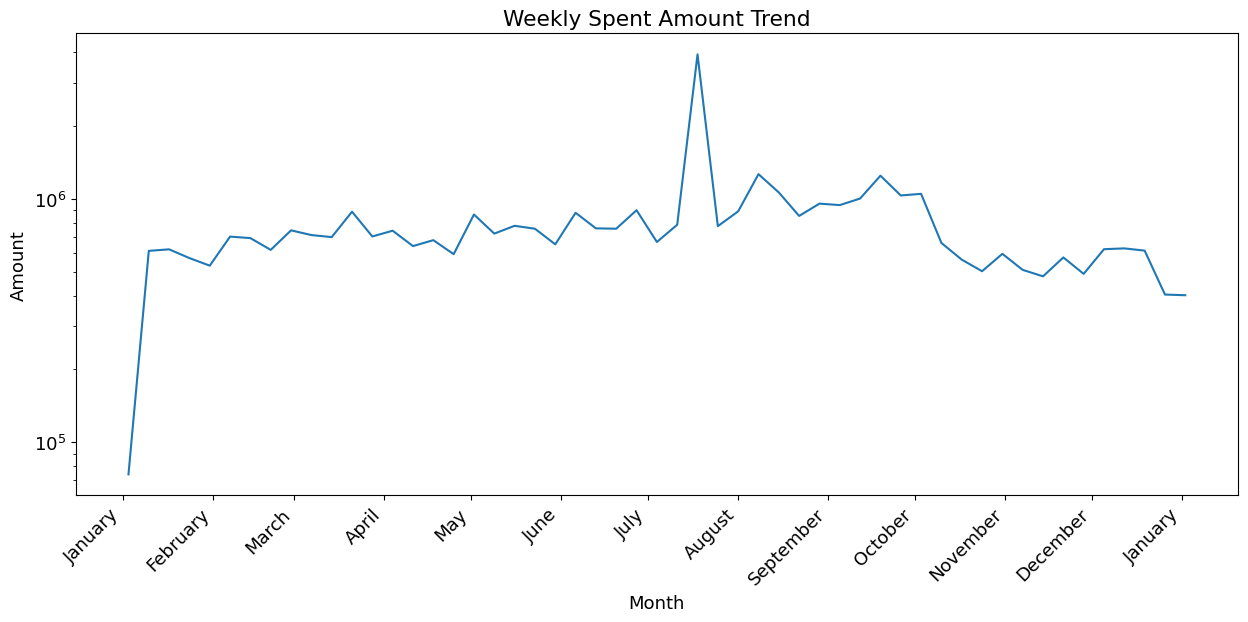

In [138]:
monthly_data = data.groupby(pd.Grouper(key='Date',freq='W')).size()
monthly_data_amount = data.groupby(pd.Grouper(key='Date',freq='W'))
x = monthly_data_amount['Amount'].sum()
print(x)
plt.plot(monthly_data.index, x)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.yscale('log')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Weekly Spent Amount Trend')
plt.show()

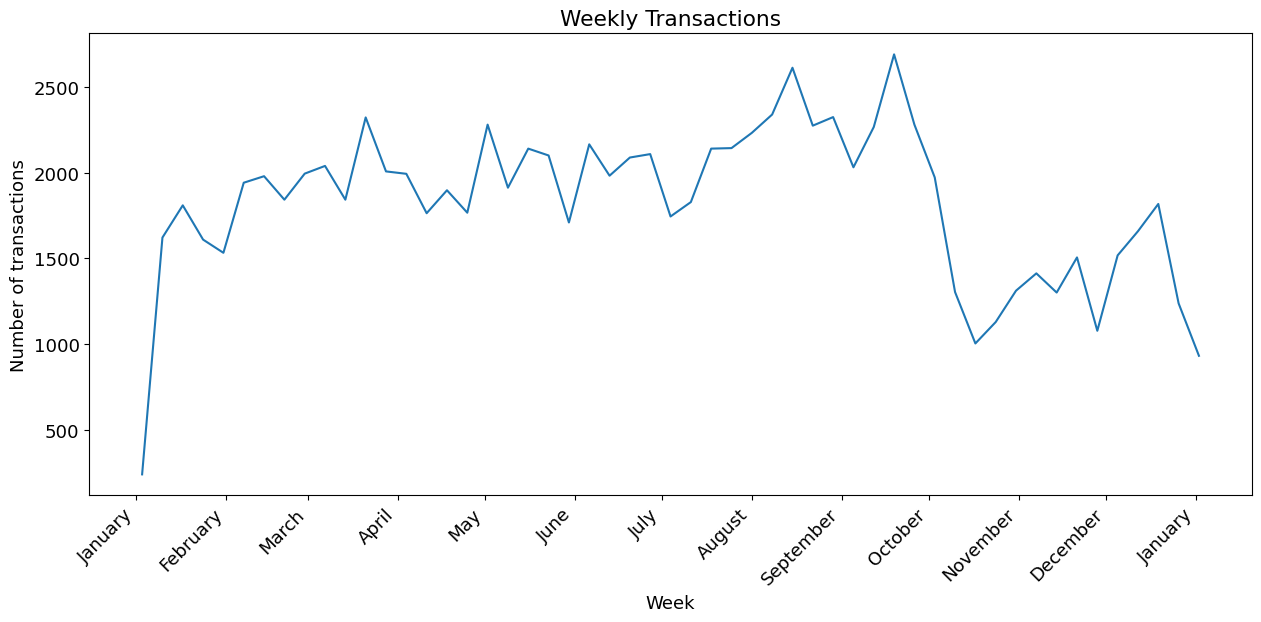

In [139]:
import matplotlib.dates as mdates
weekly_data = data.groupby(pd.Grouper(key='Date',freq='W')).size()
plt.plot(weekly_data.index, weekly_data.values)
plt.xlabel('Week')
plt.ylabel('Number of transactions')
plt.title('Weekly Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xticks(rotation=45,ha='right')
plt.show()

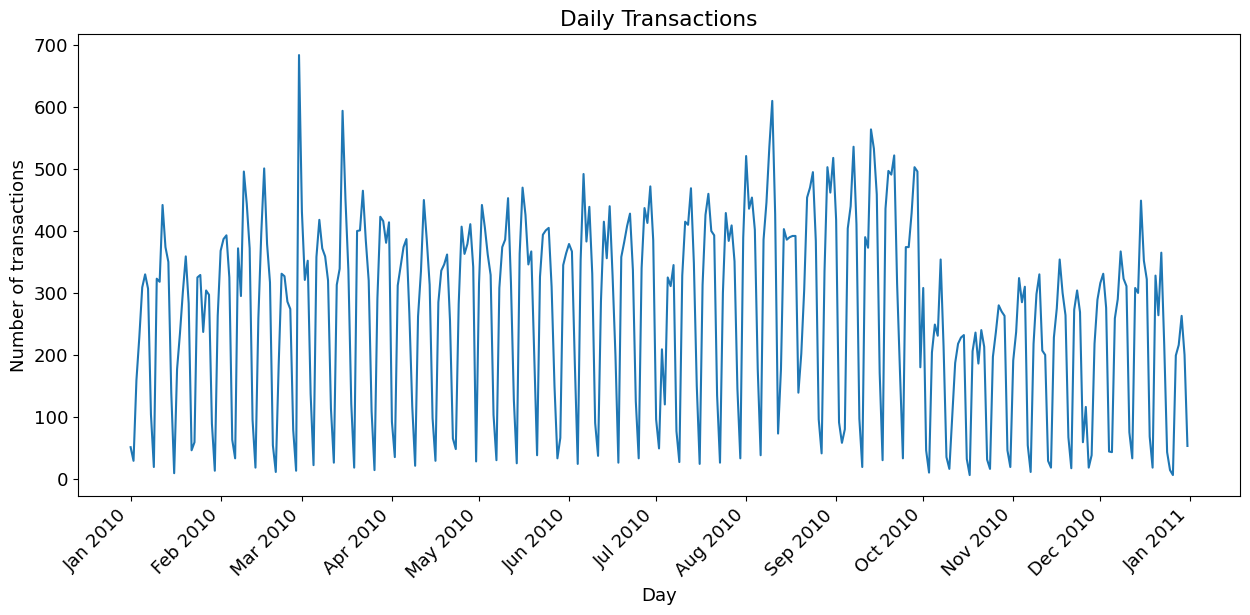

In [175]:
import matplotlib.dates as mdates
daily_data = data.groupby(pd.Grouper(key='Date',freq='D')).size()
plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Daily Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')

plt.show()

In [162]:
len(data['Merchnum'].unique())

13092

In [163]:
data['Merchnum'].value_counts().head(10)

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
Name: Merchnum, dtype: int64

[646723.66 621548.95 542669.07 424271.   381320.16 368019.01 341880.09
 305034.7  284846.24 283336.56]


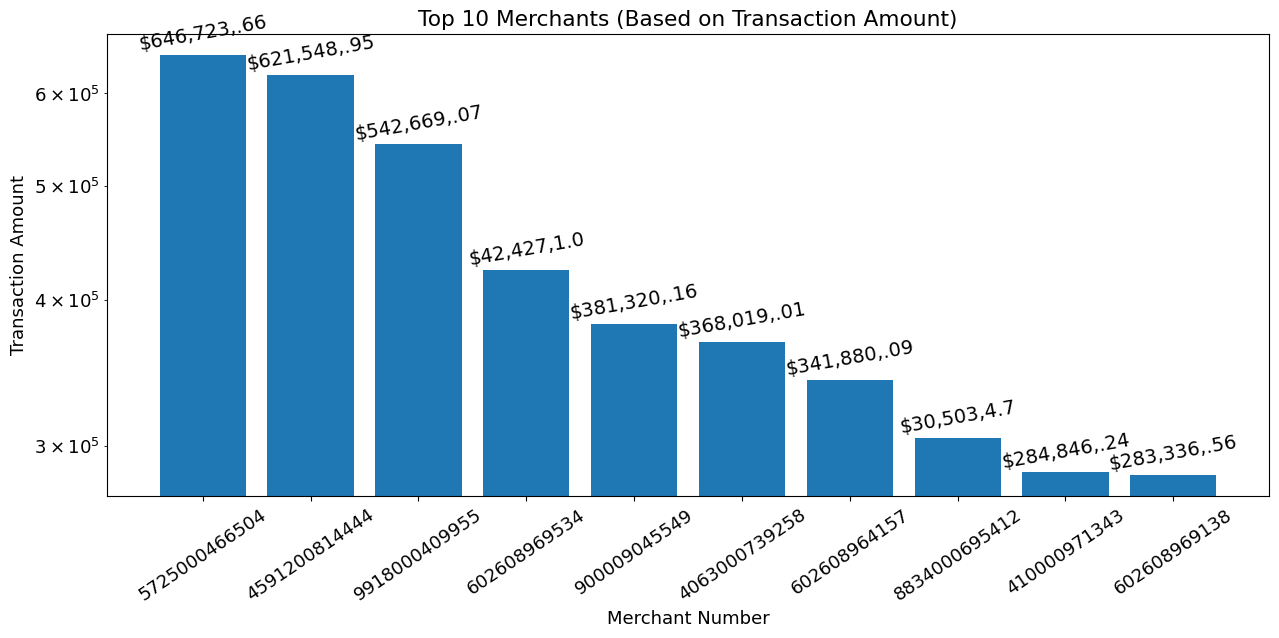

In [164]:
#data['Merchnum'].value_counts().head(15).plot(kind = 'bar')


monthly_data_amount = data.groupby(pd.Grouper(key='Merchnum'))
monthly_data =monthly_data_amount['Amount'].sum().sort_values(ascending = False).head(10)
print(monthly_data.values)

plt.bar(monthly_data.index, monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.01,'$'+three_commas(str(j)),ha = 'center', fontsize = 14, rotation = 10)
plt.xticks(rotation=34)
plt.yscale('log')
plt.title('Top 10 Merchants (Based on Transaction Amount)')
plt.ylabel('Transaction Amount')
plt.xlabel('Merchant Number')
plt.show()
#plt.rcParams["figure.figsize"] = (15,6)
#
#

#plt.ylim(bottom = 100)
#plt.ylim(top = 15000)

Text(0.5, 0, 'Merchant Number')

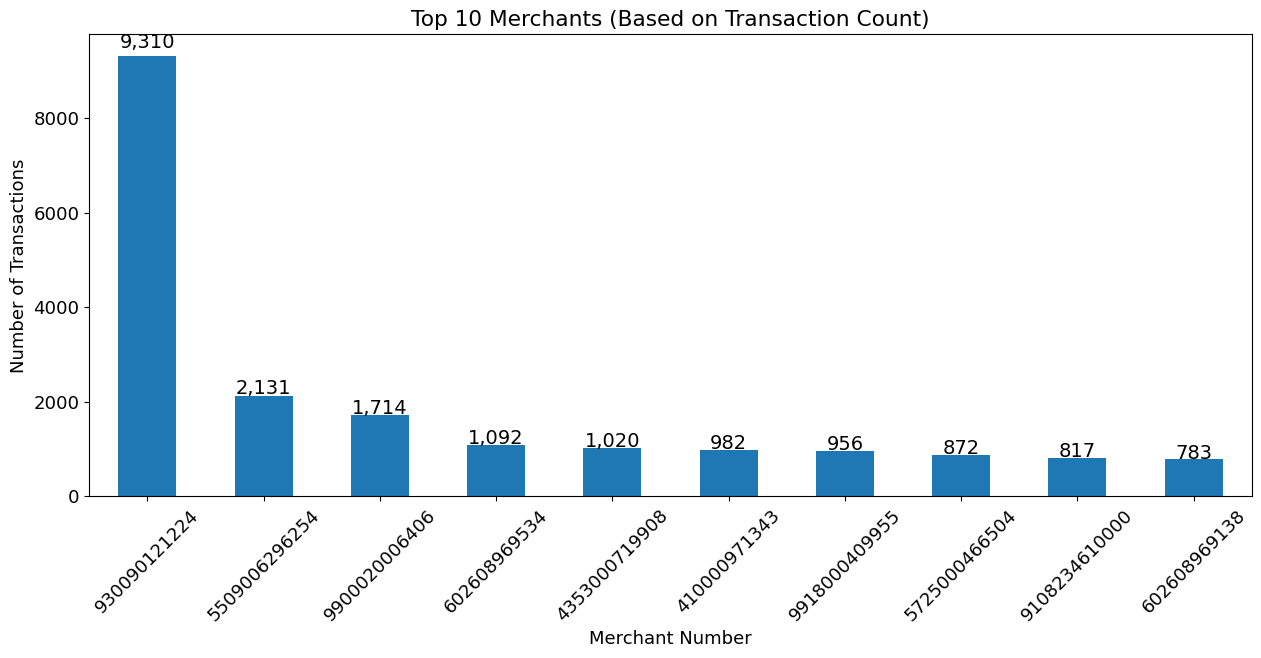

In [170]:
data['Merchnum'].value_counts().head(10).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (15,6)
for i,j in enumerate(data['Merchnum'].value_counts().head(10)):
    plt.text(i,j*1.02,three_commas(str(j)),ha = 'center', fontsize = 14)
#plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Top 10 Merchants (Based on Transaction Count)')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant Number')
#plt.ylim(bottom = 100)
#plt.ylim(top = 2000)

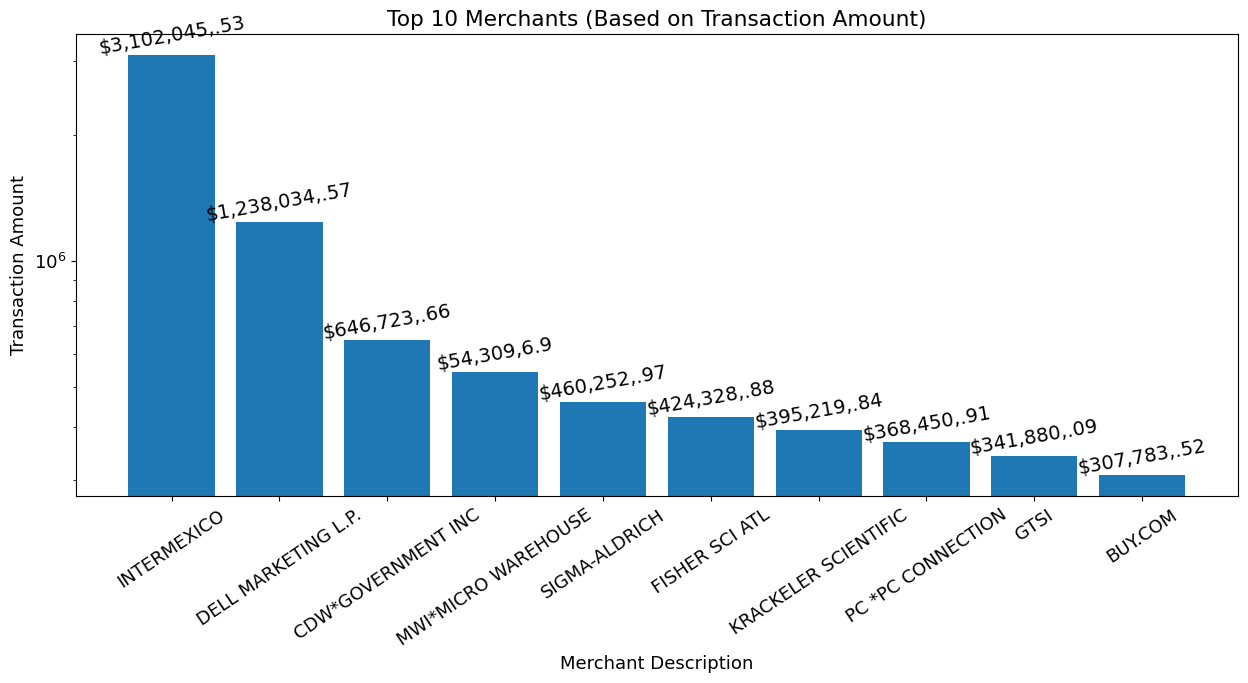

In [166]:
monthly_data_amount = data.groupby(pd.Grouper(key='Merch description'))
monthly_data =monthly_data_amount['Amount'].sum().round(2).sort_values(ascending = False).head(10)
plt.bar(monthly_data.index, monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.01,'$'+three_commas(str(j)),ha = 'center', fontsize = 14, rotation = 10)
plt.xticks(rotation=34)
plt.yscale('log')
plt.title('Top 10 Merchants (Based on Transaction Amount)')
plt.ylabel('Transaction Amount')
plt.xlabel('Merchant Description')
plt.show()

In [167]:
len(data['Merch description'].unique())

13126

In [168]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

In [16]:
len(data['Merch state'].unique())

228

Text(0.5, 0, 'Merchant State')

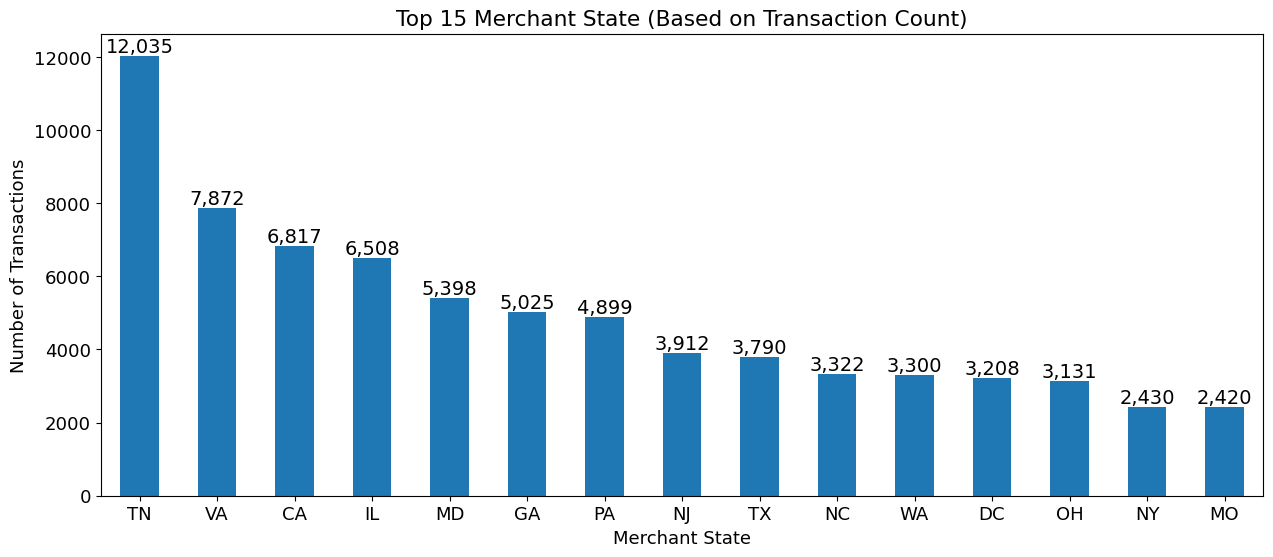

In [171]:
data['Merch state'].value_counts().head(15).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (15,6)
for i,j in enumerate(data['Merch state'].value_counts().head(15)):
    plt.text(i,j+100,three_commas(str(j)),ha = 'center', fontsize = 14)
#plt.yscale('log')
plt.xticks(rotation=0)
plt.title('Top 15 Merchant State (Based on Transaction Count)')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant State')


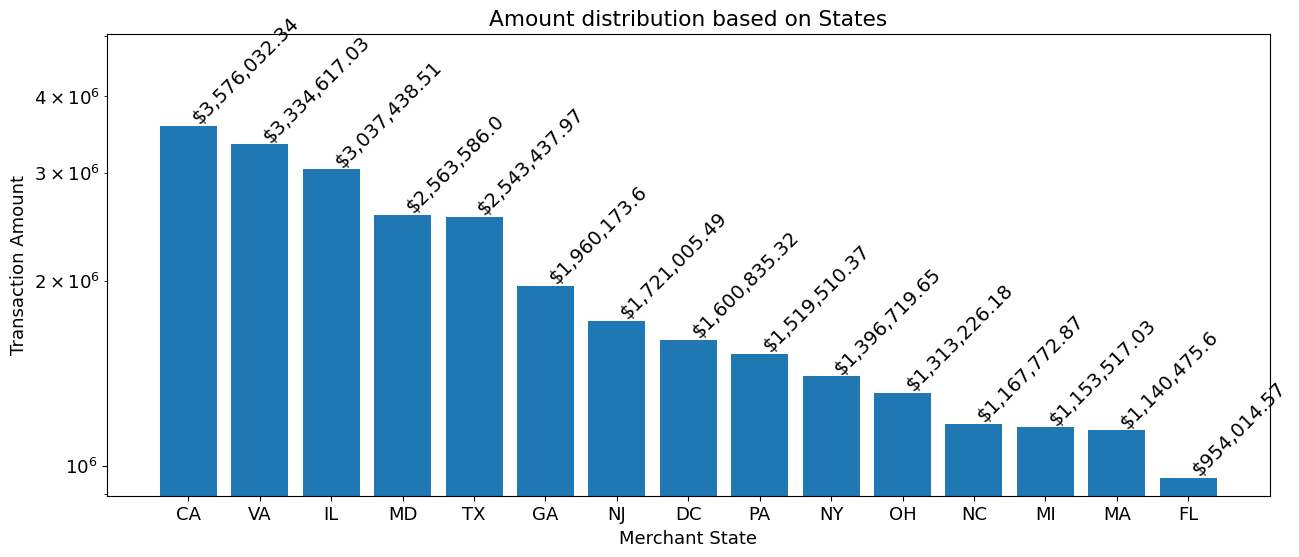

In [147]:
monthly_data_amount = data.groupby(pd.Grouper(key='Merch state'))
monthly_data =monthly_data_amount['Amount'].sum().round(2).sort_values(ascending = False).head(15)
plt.bar(monthly_data.index, monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.01,'$'+three_commas(str(j)),ha = 'left', fontsize = 14, rotation = 45)
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Amount distribution based on States')
plt.ylabel('Transaction Amount')
plt.xlabel('Merchant State')
plt.ylim(top = 5050000)
plt.show()

In [19]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

TypeError: text() missing 1 required positional argument: 's'

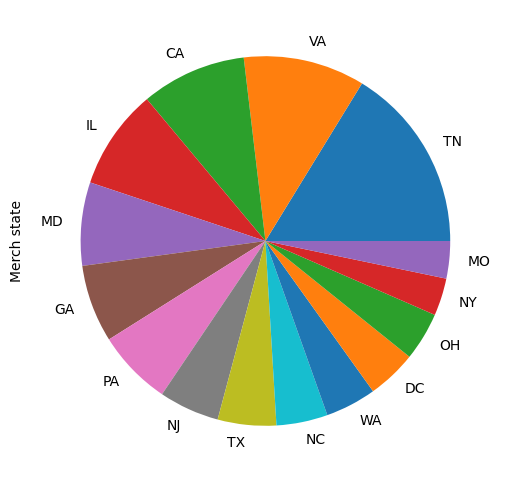

In [20]:
data['Merch state'].value_counts().head(15).plot(kind = 'pie')
#plt.rcParams["figure.figsize"] = (15,6)
for i,j in enumerate(data['Merch state'].value_counts().head(10)):
    plt.text(i,j,ha = 'center', fontsize = 14)

In [ ]:


merchstate_counts = data['Merch state'].value_counts()

merchstate_counts_pct = (merchstate_counts/merchstate_counts.sum())*100
print(merchstate_counts_pct)

# Sort the merchstates by the number of transactions in descending order and select the top 10
top_10_merchstates = merchstate_counts_pct.sort_values(ascending=False).head(10)

# Plot the top 10 merchstates as a pie chart
plt.pie(top_10_merchstates, labels=top_10_merchstates.index)
plt.title('Top 10 Merchstates by Number of Transactions')
plt.show()

In [184]:
len(data['Merch zip'].unique())

4568

In [186]:
data['Merch zip'].value_counts()

38118    11868
0         4656
63103     1650
8701      1267
22202     1250
         ...  
89125        1
46225        1
27025        1
6076         1
36043        1
Name: Merch zip, Length: 4568, dtype: int64

0        38118
1         1803
2        20706
3        38118
4        38118
         ...  
96748    41042
96749    45248
96750    45150
96751    92656
96752     7606
Name: Merch zip, Length: 96753, dtype: int32


Text(0.5, 0, 'Merchant Zip')

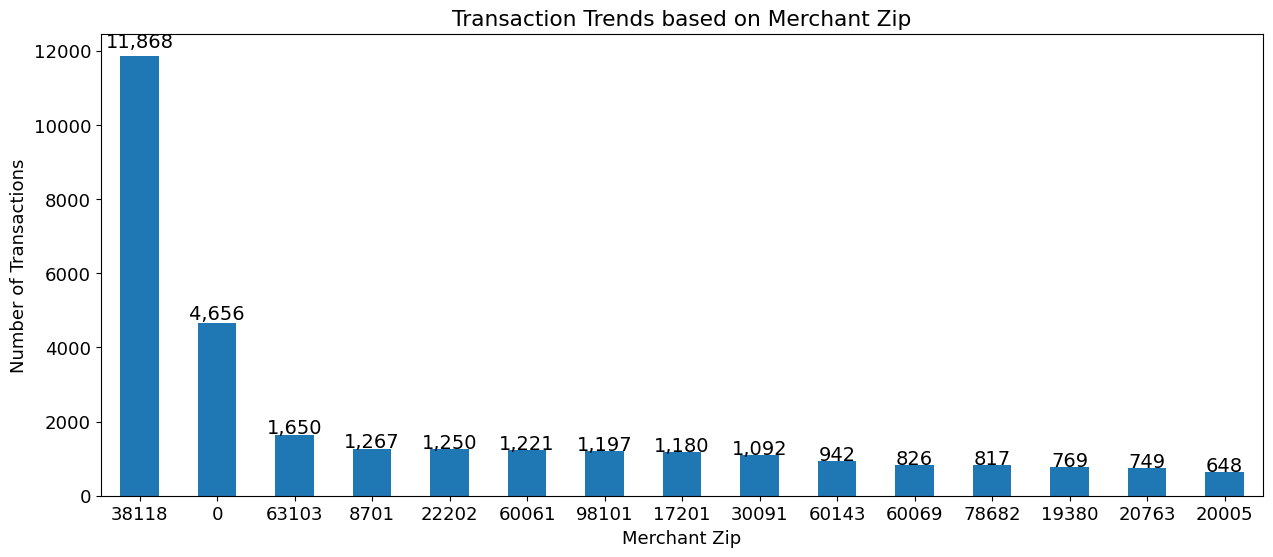

In [182]:
#Merchzip = data['Merch zip'].fillna(value = '00000')

Merchzip = data['Merch zip'].dropna()
data['Merch zip'] = Merchzip.astype(int)
print(Merchzip)
data['Merch zip'] = data['Merch zip'].fillna(value = '00000').astype(int).astype(str).str.zfill(5)


#plt.yscale('log')
data['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (15,6)
for i,j in enumerate(data['Merch zip'].value_counts().head(15)):
    plt.text(i,j*1.02,three_commas(str(j)),ha = 'center', fontsize = 14)
plt.xticks(rotation=0)
plt.title('Transaction Trends based on Merchant Zip')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant Zip')

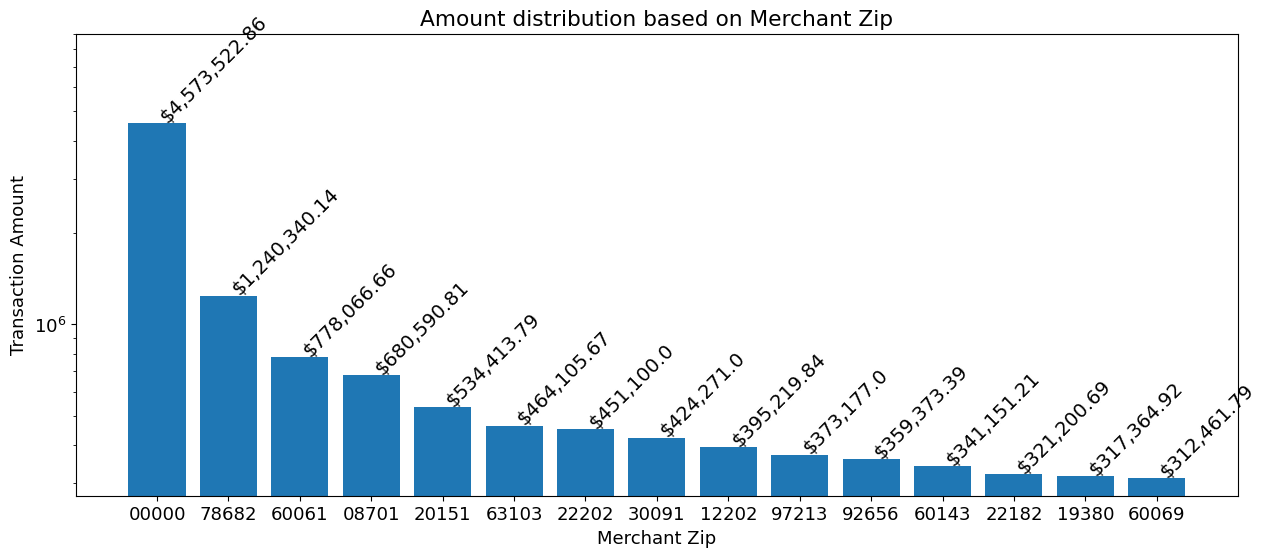

In [150]:
monthly_data_amount = data.groupby(pd.Grouper(key='Merch zip'))
monthly_data =monthly_data_amount['Amount'].sum().round(2).sort_values(ascending = False).head(15)
plt.bar(monthly_data.index, monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.01,'$'+three_commas(str(j)),ha = 'left', fontsize = 14, rotation = 45)
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Amount distribution based on Merchant Zip')
plt.ylabel('Transaction Amount')
plt.xlabel('Merchant Zip')
plt.ylim(top = 9000000)
plt.show()

In [187]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

Text(0.5, 0, 'Transaction Type')

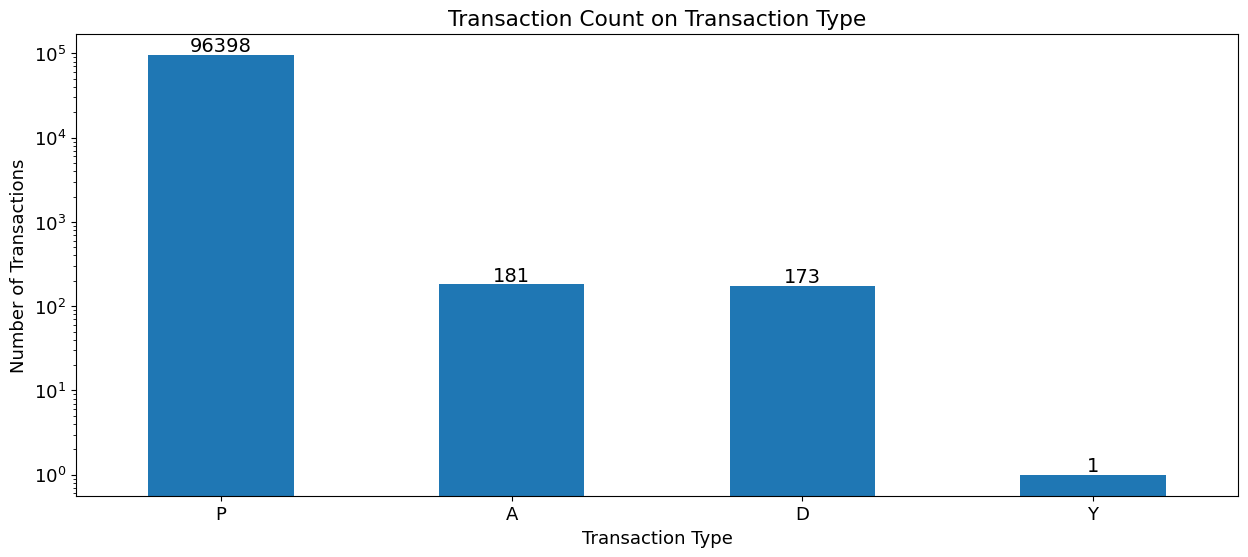

In [190]:
data['Transtype'].value_counts().plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (15,6)
for i,j in enumerate(data['Transtype'].value_counts()):
    plt.text(i,j*1.1,j,ha = 'center', fontsize = 14)
plt.yscale('log')
plt.xticks(rotation=0)
plt.title('Transaction Count on Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')

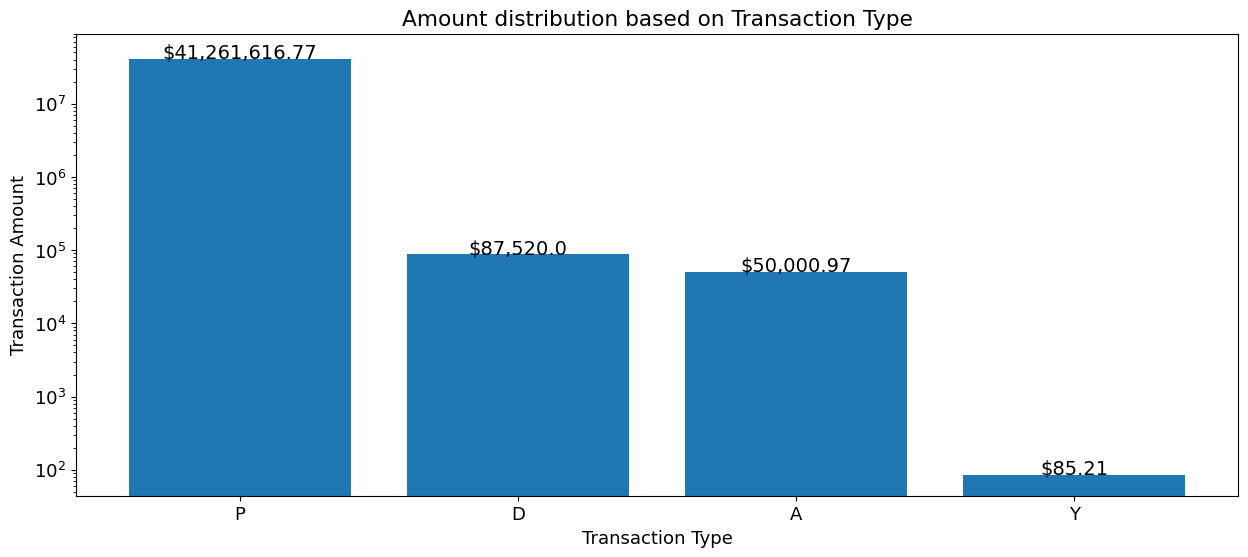

In [153]:
monthly_data_amount = data.groupby(pd.Grouper(key='Transtype'))
monthly_data =monthly_data_amount['Amount'].sum().round(2).sort_values(ascending = False).head(15)
plt.bar(monthly_data.index, monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.01,'$'+three_commas(str(j)),ha = 'center', fontsize = 14, rotation = 0)
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Amount distribution based on Transaction Type')
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.ylim(top = 90000000)
plt.show()

In [21]:
data['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64

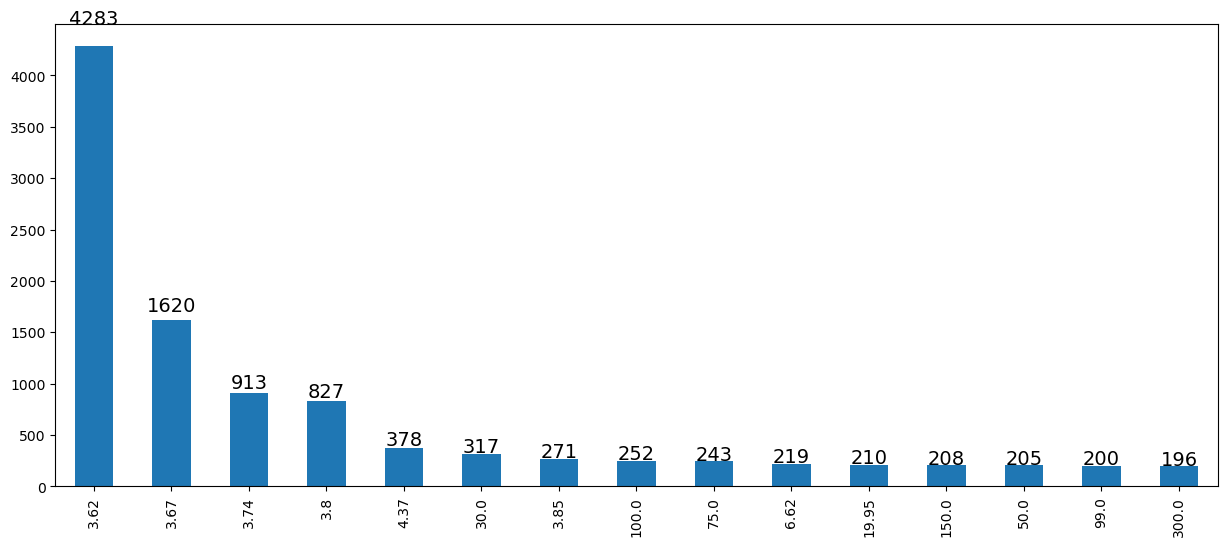

In [22]:
data['Amount'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Amount'].value_counts().head(15)):
    plt.text(i,j*1.05,j,ha = 'center', fontsize = 14)

(0.1, 101589.6)

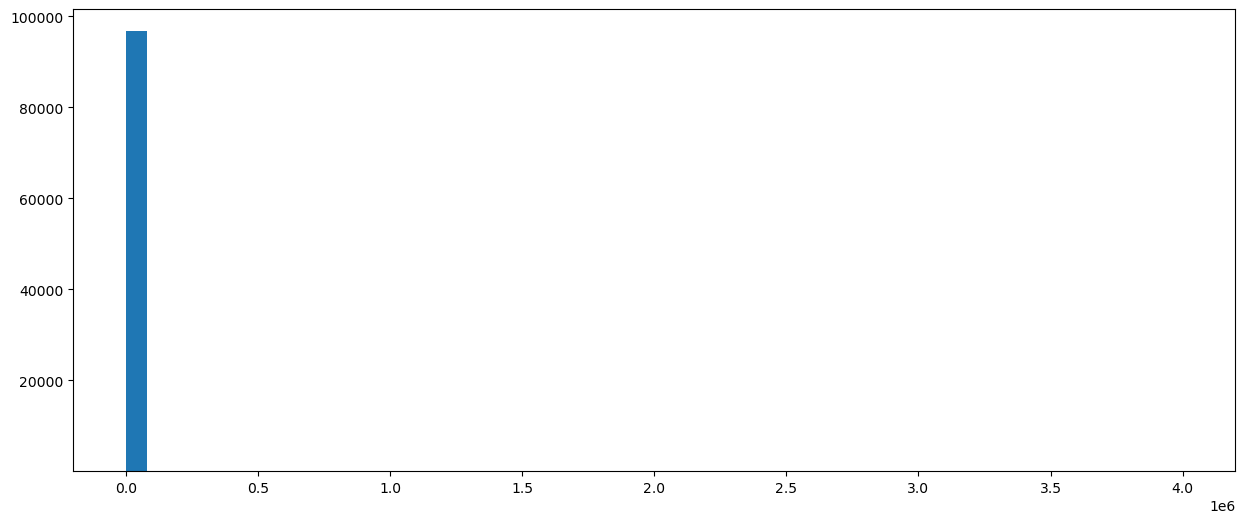

In [23]:
plt.hist(data['Amount'],bins=50,range=[0,4000000])
#plt.yscale('log')
plt.ylim(bottom = .1)

In [24]:
data['Amount'].max()

3102045.53

Text(0.5, 0, 'Amount (Interval of $100)')

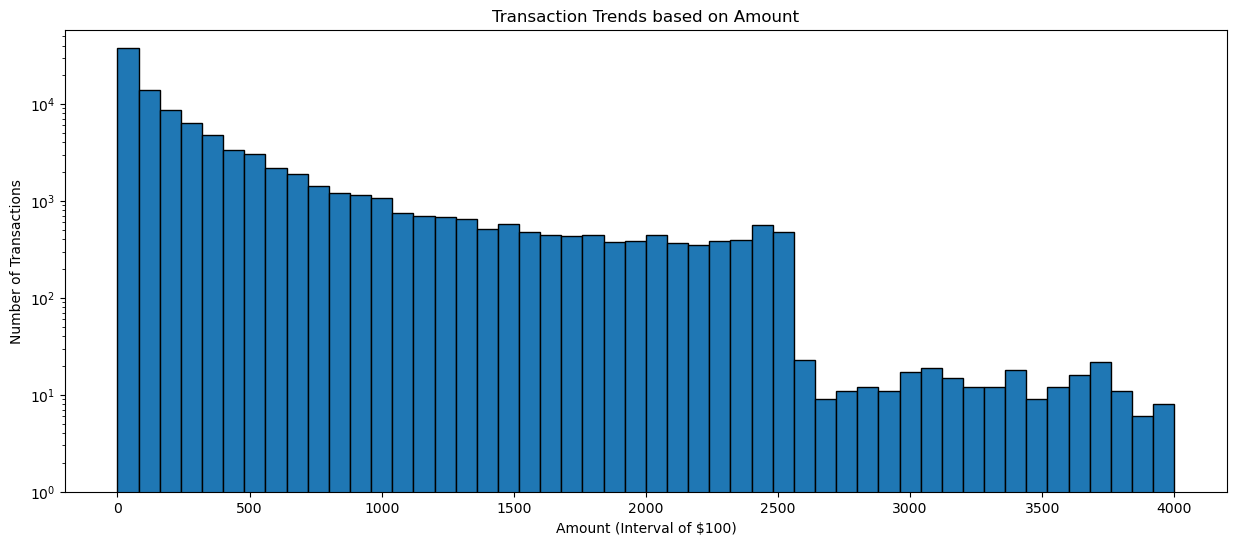

In [25]:
plt.hist(data['Amount'],bins=50,range=[0,4000],edgecolor='black',linewidth=1)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.title('Transaction Trends based on Amount')
plt.ylabel('Number of Transactions')
plt.xlabel('Amount (Interval of $100)')
#plt.savefig('amount distribution')

Text(0.5, 0, 'Fraud Indicator')

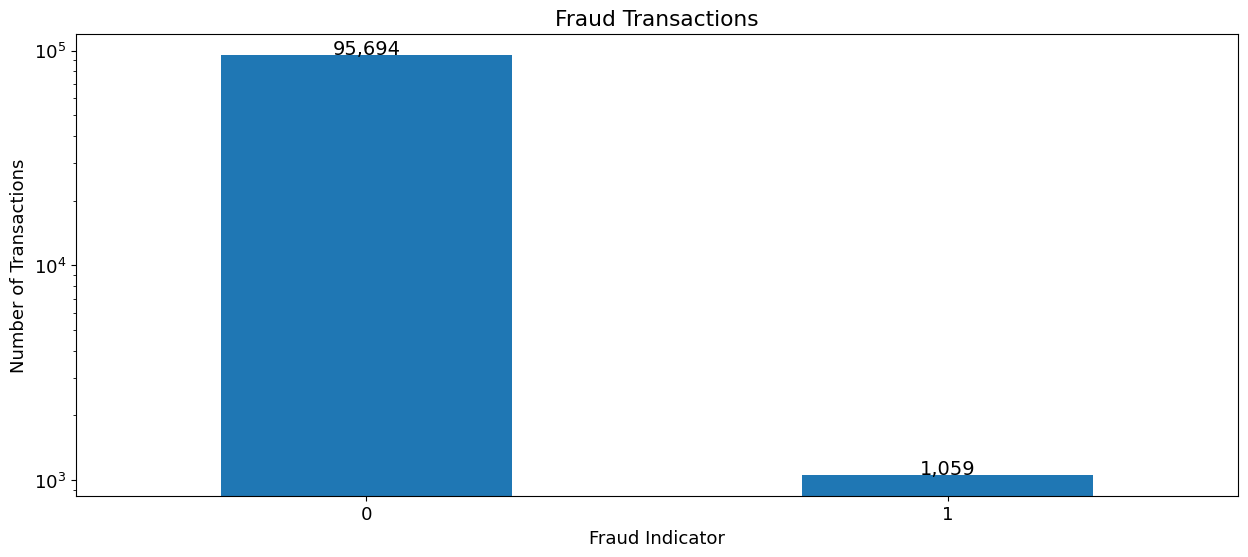

In [174]:
data['Fraud'].value_counts().plot(kind = 'bar')
plt.yscale('log')
for i,j in enumerate(data['Fraud'].value_counts()):
    plt.text(i,j*1,three_commas(str(j)),ha = 'center', fontsize = 14)
plt.xticks(rotation=0)
plt.title('Fraud Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Fraud Indicator')

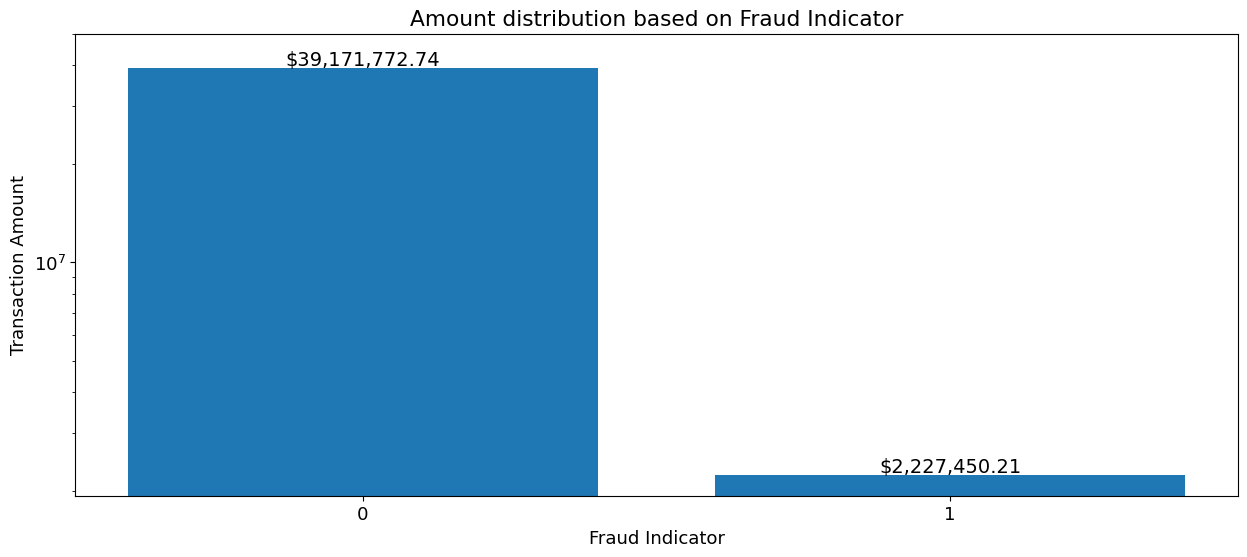

In [155]:
monthly_data_amount = data.groupby(pd.Grouper(key='Fraud'))
monthly_data =monthly_data_amount['Amount'].sum().round(2).sort_values(ascending = False).head(15)
plt.bar(['0','1'], monthly_data.values)
for i,j in enumerate(monthly_data):
    plt.text(i,j*1.02,'$'+three_commas(str(j)),ha = 'center', fontsize = 14, rotation = 0)
plt.xticks(rotation=0)
plt.yscale('log')
plt.title('Amount distribution based on Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.xlabel('Fraud Indicator')
plt.ylim(top = 50000000)
plt.show()

## OK, that's what the raw data looks like. Now let's remove the exclusions and explore the data a bit more

In [28]:
data['DOW'] = data['Date'].dt.day_name()
print(data.shape)
print(data['Amount'].max())

(96753, 11)
3102045.53


In [29]:
# remove exclusions: only keep the type P's and remove one high transaction outlier
temp = data[data['Transtype'] == 'P']
data = temp[temp['Amount'] <= 3000000]
data = data.reset_index(drop=True)
print(data.shape)
print(data['Amount'].max())

(96397, 11)
47900.0


In [30]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday


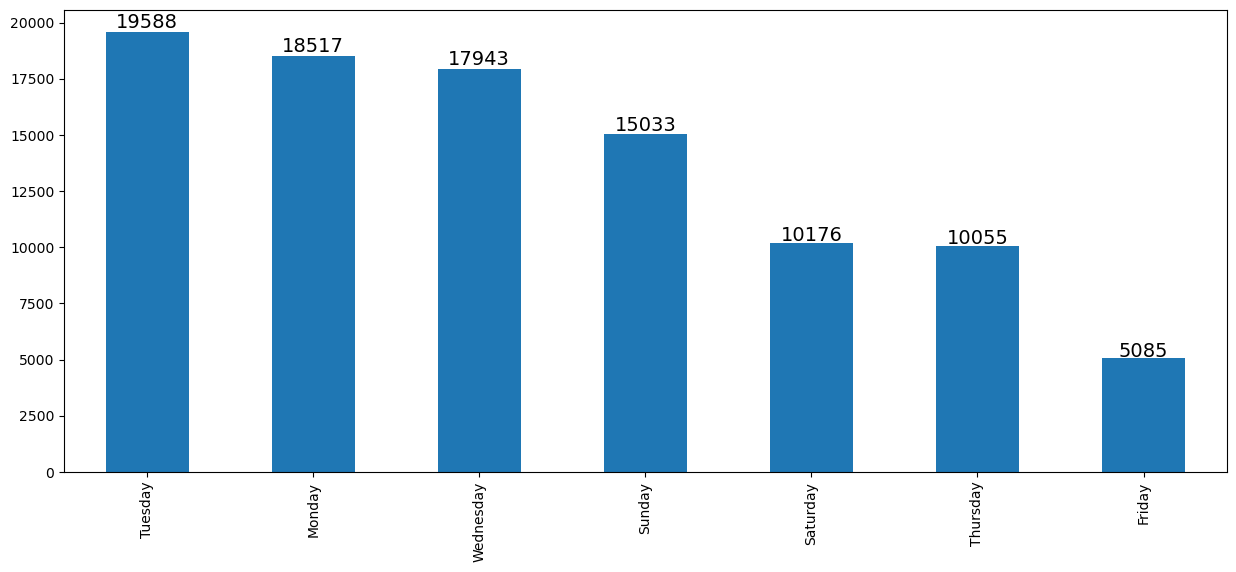

In [31]:
data['DOW'].value_counts().plot(kind = 'bar')
for i,j in enumerate(data['DOW'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

In [32]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


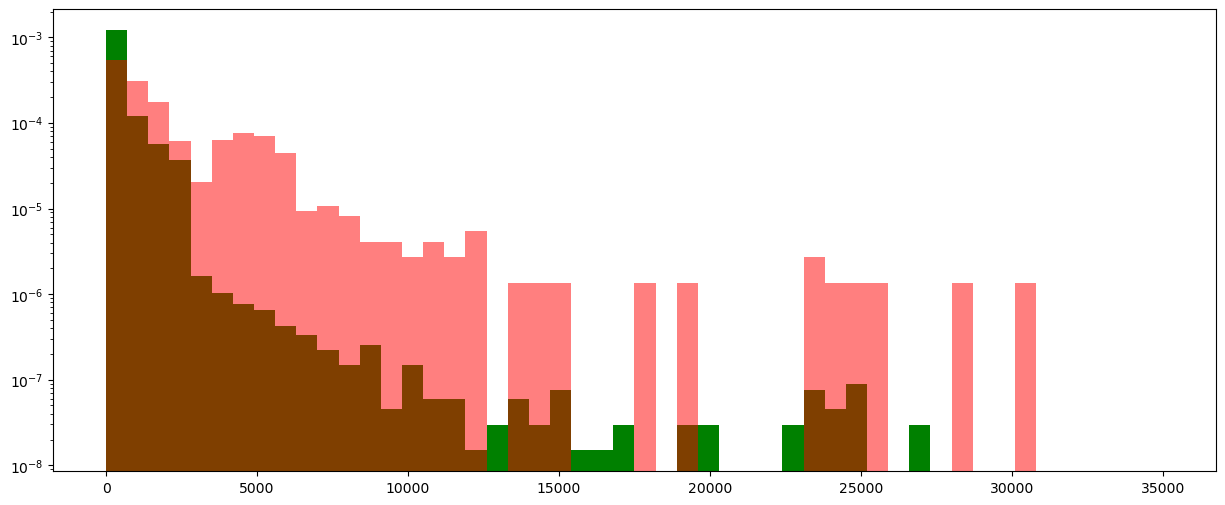

In [33]:
plt.hist(goods['Amount'],bins=50,range=[0,35000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,35000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

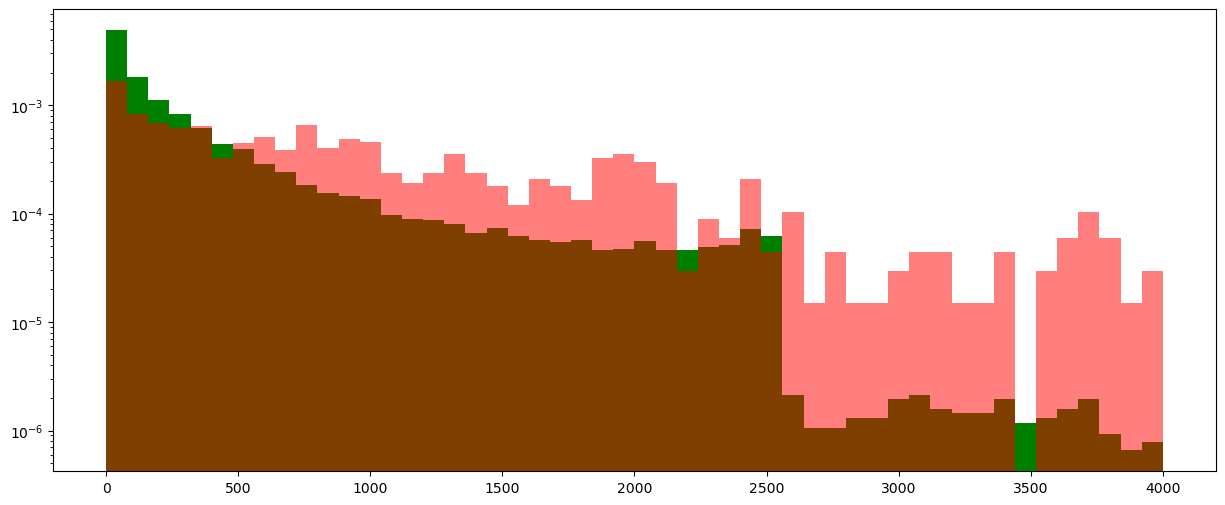

In [34]:
plt.hist(goods['Amount'],bins=50,range=[0,4000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,4000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

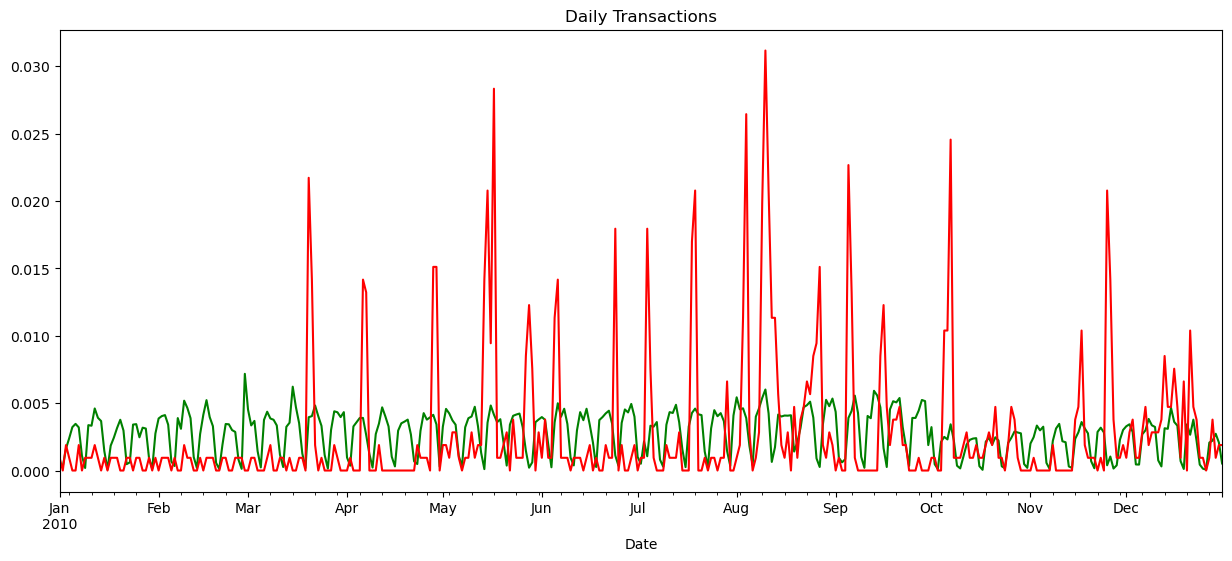

In [35]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weeky Transactions'}, xlabel='Date'>

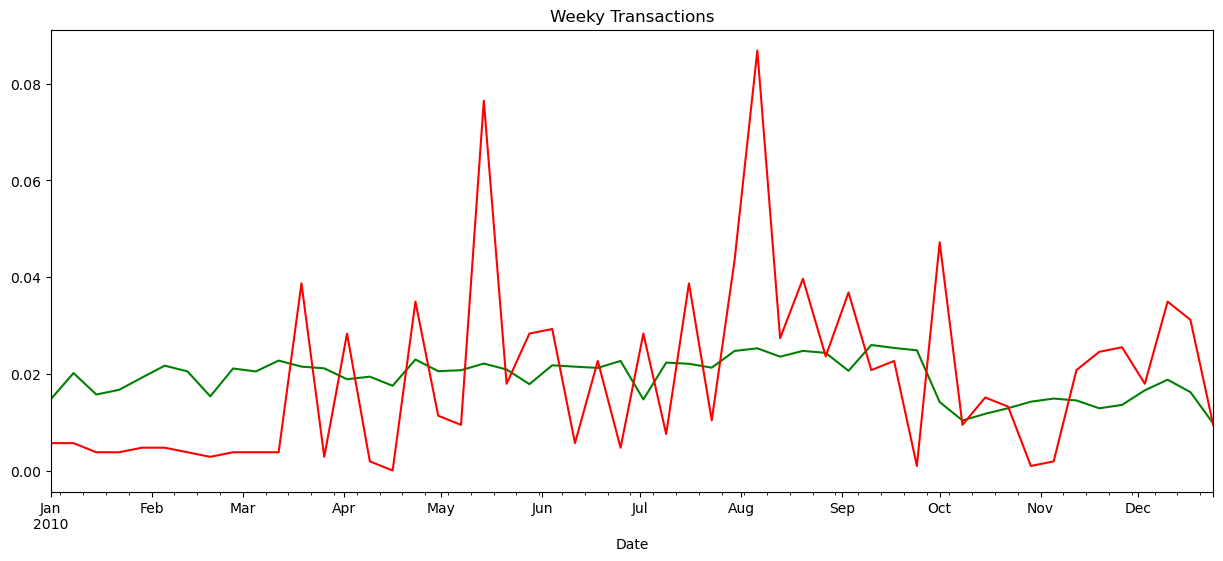

In [36]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.head(52).plot(title = 'Weeky Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.head(52).plot(color = 'red')

<AxesSubplot:title={'center':'Approximately Monthly Transactions'}, xlabel='Date'>

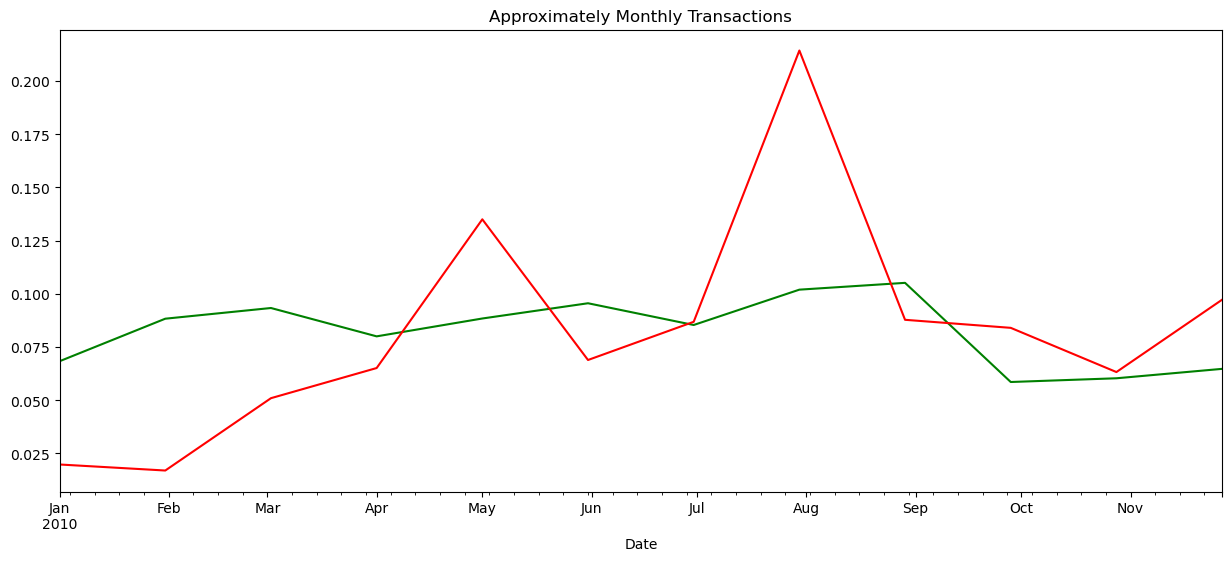

In [37]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 30)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.head(12).plot(title = 'Approximately Monthly Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 30)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.head(12).plot(color = 'red')

In [38]:
# takes about 20 seconds to run
stop_time = datetime.now()
print('duration: ', stop_time - start_time)

duration:  0:00:10.556533
